Part a) Write your own Stochastic Gradient Descent Code

### GD
Create
* [X] A plain gradient descent with a fixed learning rate which you tune
* [X] Add momentum
* [X] Compare convergence between the momentum model and one with fixed learning rate

Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs:

### SGD
Create
* [ ] A stochastic gradient descent with a fixed learning rate which you tune
* [ ] Add momentum
* [ ] Compare convergence between the momentum model and one with fixed learning rate
Discuss
* [ ] Discuss the results as functions of the various parameters (size of batches, number of epochs etc). 

### Adagrad

* [ ] Implement Adagrad without momentum for GD
* [ ] Implement Adagrad with momentum for GD
* [ ] Implement Adagrad without momentum for SGD
* [ ] Implement Adagrad with momentum for SGD

### RMSprop

* [ ] Implement RMSprop

### Adam

* [ ] Implement Adaptive momement estimation 

### Replace gradient
* [ ] Choose Autograd or JAX
* [ ] Replace analytical gradient with the chosen


https://seaborn.pydata.org/generated/seaborn.heatmap.html


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# simple function
def f(x):
    return 1 + x + x**2

# analytical solution
def f_prime(x):
    return 1+2*x

In [ ]:
# Forslag til annotate points -Jonatan
def annotate_points(x, y, color):
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(str(i), (xi, yi), textcoords="offset points", xytext=(0,5), ha='center', fontsize=12, color=color)


### Forslag Trond og Eirik

Vi skal erstatte matrise inverteringen i OLS og Ridge med GD og SGD. For OLS skal vi løse:

$$
    \hat{\beta}_{OLS} 
    = \textrm{arg}\min_{\beta\in\mathbb{R}^p} C_{OLS}(y-X\beta), 
$$

$$
    C_{OLS}(y-X\beta) = \frac{1}{N} \lVert y-X\beta \rVert_2^2. 
$$

For Ridge løser vi:

$$
    \hat{\beta}_{Ridge} 
    = \textrm{arg}\min_{\beta\in\mathbb{R}^p} C_{Ridge}(y-X\beta), 
$$

$$
    C_{Ridge}(y-X\beta) = \frac{1}{N} \lVert y-X\beta \rVert_2^2 + \lambda \lVert \beta \rVert_2. 
$$

For å benytte GD trenger vi analytiske uttrykk for gradienten til disse. Vi finner:

$$
    \nabla_{\beta}C_{OLS} = \frac{2}{N} X^T(X\beta - y),
$$

$$
    \nabla_{\beta}C_{Ridge} = 2 \left( \frac{1}{N} X^T(X\beta - y) + \lambda\beta^T \right).
$$


https://www.deeplearningbook.org/contents/optimization.html


In [1]:
!pip install jax
!pip install jaxlib
import numpy as np
import jax.numpy as jnp
from jax import grad, nn
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.0/207.0 kB 49.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 MB 34.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [ ]:
# simple function
def f(x):
    return 1 + x + x**2

def feature_matrix(x, num_features):
    """
    x: array with x values
    num_features: the degree of polynomial 1+x+...+x^p

    returns:
    X: The feature matrix,a 2D numpy array with a column for each feature
    """

    return np.array([x**i for i in range(num_features)]).T[0]


def MSELoss(y, y_pred):
    """MSE loss of prediction array.

    Args:
        y (ndarray): Target values
        y_pred (ndarray): Predicted values

    Returns:
        float: MSE loss
    """
    return jnp.sum(jnp.power(y - y_pred, 2)) / y.shape[0]


def model(beta, X):
    return jnp.dot(X, beta)


In [ ]:
def OLS_grad(beta, X, y):
    n = y.shape[0]
    return 2*(np.dot(X.T, ( model(beta, X) - y))) / n

def RIDGE_grad(beta, X, y, lam=0.01):
    n = y.shape[0]
    return 2*((np.dot(X.T, ( model(beta, X) - y)) / n) + lam*beta)


#### Gradient descent



In [ ]:
def GD(grad_method, x, y, f(x)model, beta0, lr, n_epochs, gamma=None):
    """

    minimizes ...

    PARAMS
    grad_method : the function estimeating the gradient of the function to minimise
    x : function input
    y : target function output
    beta0 : initial point in the beta space 
    lr : learning rate, size of stept in direction of decrease
    n_epochs : number of iterations
    gamma : if given, perform with momentum parameter gamma
    
    RETURNS

    """

    loss_list = []

    # Make feature matrix
    X = feature_matrix(x, beta0.shape[0])

    # Initialise
    betas = [beta0]
    v = np.zeros_like(beta0) # initial v for momentum

    # Perform training
    for i in range(n_epochs):
        
        # Evaluate gradient at previous x
        grad = grad_method(betas[-1], X, y)

        #grad = derivative(betas[-1])
        loss_list.append(MSELoss(y, model(betas[-1], X)))
        # Perform step
        if gamma is not None:
            v = gamma * v + lr * grad
            betas.append( betas[-1] - v )
        else:
            betas.append( betas[-1] - lr * grad)
    
    # Return the found values of x 
    return betas, loss_list

In [ ]:
def TODO_GD(grad_method, X, y, beta0 = None, test_cost_func = None, lr=0.01, n_epochs=50, gamma=None, store_all = False):
    """


    """

    # If test_cost_func:

    if store_all:
        betas = []

    # Make feature matrix
    X = feature_matrix(x, beta0.shape[0])

    # Initialise
    betas = [beta0]
    v = np.zeros_like(beta0) # initial v for momentum

    # Perform training
    for i in range(n_epochs):
        
        # Evaluate gradient at previous x
        grad = grad_method(betas[-1], X, y)

        #grad = derivative(betas[-1])
        loss_list.append(MSELoss(y, model(betas[-1], X)))
        # Perform step
        if gamma is not None:
            v = gamma * v + lr * grad
            betas.append( betas[-1] - v )
        else:
            betas.append( betas[-1] - lr * grad)
    
    # Return the found values of x 
    return betas, loss_list

#### Tuning the learning rate

TODO: we should at some point find an efficient way to tone many parameters at the same time etc...

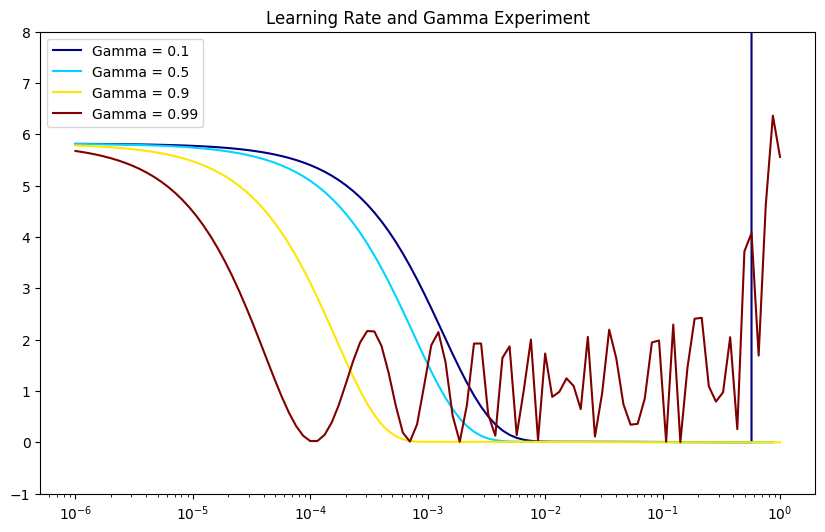

In [ ]:
def lr_gamma_experiment(learning_rates, grad_method, x, y, beta0, n_epochs, gamma_values):
    """
    Plot the final error for fixed number of epochs and different learning rates
    for multiple gamma values on the same plot.
    """

    plt.figure(figsize=(10, 6))
    colors = plt.cm.jet(np.linspace(0, 1, len(gamma_values)))

    for idx, gamma in enumerate(gamma_values):
        final_errors = []
        for lr in learning_rates:
            betas, loss_list = GD(grad_method, x, y, beta0, lr, n_epochs, gamma)
            final_errors.append(loss_list[-1])

        plt.plot(learning_rates, final_errors, color=colors[idx], label=f'Gamma = {gamma}')
    
    plt.xscale('log')
    plt.ylim(-1, 8)
    plt.legend()
    plt.title('Learning Rate and Gamma Experiment')
    plt.show()

# Perform experiment
num_params = 5
num_points = 50

x = np.random.random((num_points, 1))
y = f(x)
beta0 = np.random.random((num_params, 1)) - 0.5

learning_rates = np.logspace(start=-6, stop=0, num=100)
gamma_values = [0.1, 0.5, 0.9, 0.99]
lr_gamma_experiment(learning_rates, OLS_grad, x, y, beta0, 100, gamma_values)

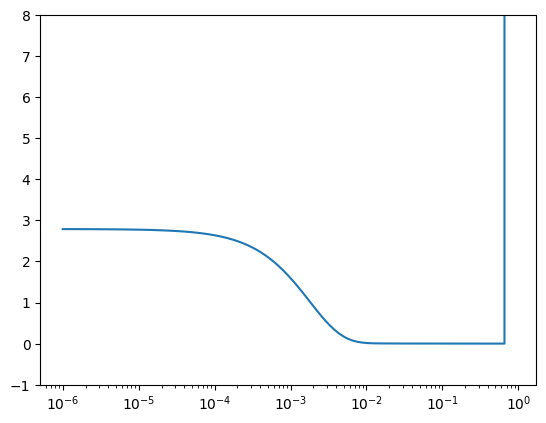

In [ ]:
def lr_experiment(learning_rates, grad_method, x, y, beta0, n_epochs):
    """
    Plot the final error for fixed number of epochs and different learning rates
    """

    final_errors = []

    for lr in learning_rates:
        
        betas, loss_list = GD(grad_method, x, y, beta0, lr, n_epochs)

        final_errors.append(loss_list[-1])

    plt.xscale('log')
    # Set y-axis limits to [0, 2]
    plt.ylim(-1, 8)
    plt.plot(learning_rates, final_errors)

# Perform experiment
num_params = 5
num_points = 50


x = np.random.random((num_points, 1))
y = f(x)
beta0 = np.random.random((num_params, 1)) - 0.5

learning_rates = np.logspace(start=-6, stop=0, num=100)
lr_experiment(learning_rates, OLS_grad, x, y, beta0, 100)


#### Experiment with and without momentum

In [ ]:
# Perform experiment
num_params = 5
num_points = 50


x = np.random.random((num_points, 1))
y = f(x)
print(x[-2])

beta0 = np.random.random((num_params, 1)) - 0.5

betas, loss_list = GD(OLS_grad, x, f(x), beta0, 0.01, 100)
betas, loss_list_2 = GD(OLS_grad, x, f(x), beta0, 0.01, 100, gamma=0.5)
beta = betas[-1] 


[0.99421191]


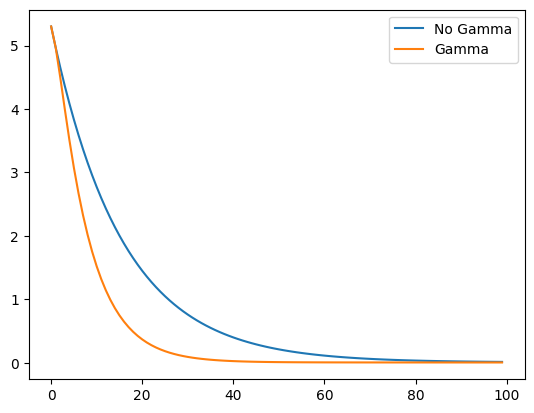

In [ ]:
plt.plot(loss_list, label="No Gamma")
plt.plot(loss_list_2, label="Gamma")
plt.legend()

#### Stochastic gradient descent

In [ ]:
n = x.shape[0]

M = 5 # Size of minibatch
m = int(n / M) # number of minis

# Partition into minibatches
def random_partition(x, y, batch_size):
    batches = []
    n = y.shape[0]
    m = int(n / batch_size)
    for i in range(m):
        index = list(range(i*batch_size, (i+1)*batch_size))
        batches.append((x[index], y[index]))

    return batches


def SGD(grad_method, x, y, beta0, lr, n_epochs, batch_size, gamma=None):


    loss_list = []

    # Make feature matrix
    #X = feature_matrix(x, y, beta0.shape[0])

    batches = random_partition(x, y, batch_size)

    # Initialise
    betas = [beta0]
    v = np.zeros_like(beta0) # initial v for momentum

    # Number of batches
    n = y.shape[0]
    m = int(n / batch_size) 

    X_true = feature_matrix(x, beta0.shape[0])

    # Perform training
    for i in range(n_epochs):

        for j in range(m):
            k = np.random.randint(m)
            x_b, y_b = batches[k]

            X = feature_matrix(x_b, num_features=beta0.shape[0])

            # Evaluate gradient at previous x
            grad = OLS_grad(betas[-1], X, y_b)

            #grad = derivative(betas[-1])
            loss_list.append(MSELoss(y, model(betas[-1], X_true)))
            # Perform step
            if gamma is not None:
                v = gamma * v + lr * grad
                betas.append( betas[-1] - v )
            else:
                betas.append( betas[-1] - lr * grad)
    
    # Return the found values of x 
    return betas, loss_list


[Array(0.22897893, dtype=float32), Array(0.21692863, dtype=float32), Array(0.2103652, dtype=float32), Array(0.19626555, dtype=float32), Array(0.18638374, dtype=float32), Array(0.17400737, dtype=float32), Array(0.16437176, dtype=float32), Array(0.1533451, dtype=float32), Array(0.1432823, dtype=float32), Array(0.13443696, dtype=float32), Array(0.12856379, dtype=float32), Array(0.12017231, dtype=float32), Array(0.11279278, dtype=float32), Array(0.10997827, dtype=float32), Array(0.1058003, dtype=float32), Array(0.1013204, dtype=float32), Array(0.09441421, dtype=float32), Array(0.08949752, dtype=float32), Array(0.08405464, dtype=float32), Array(0.07883089, dtype=float32), Array(0.07469142, dtype=float32), Array(0.07138754, dtype=float32), Array(0.06756557, dtype=float32), Array(0.06629147, dtype=float32), Array(0.06281572, dtype=float32), Array(0.05957486, dtype=float32), Array(0.05558519, dtype=float32), Array(0.05435571, dtype=float32), Array(0.05158104, dtype=float32), Array(0.04830225, 

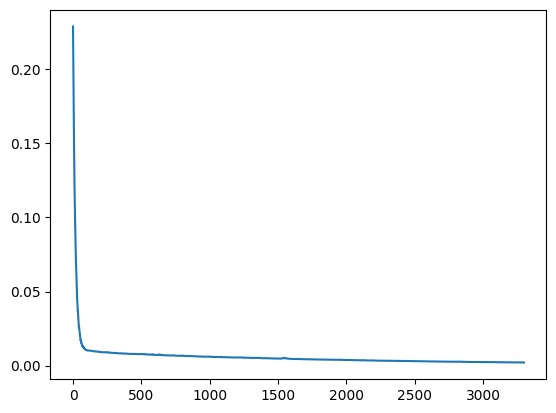

In [ ]:
num_params = 5
num_points = 100

beta0 = np.random.random((num_params, 1))

x = np.random.random((num_points, 1))
y = f(x)


betas, loss_list = SGD(OLS_grad, x, y, beta0, batch_size=3, lr=0.01, n_epochs=100)

print(loss_list)
plt.plot(loss_list)

[Array(0.22897893, dtype=float32), Array(0.21692863, dtype=float32), Array(0.2103652, dtype=float32), Array(0.19626555, dtype=float32), Array(0.18638374, dtype=float32), Array(0.17400737, dtype=float32), Array(0.16437176, dtype=float32), Array(0.1533451, dtype=float32), Array(0.1432823, dtype=float32), Array(0.13443696, dtype=float32), Array(0.12856379, dtype=float32), Array(0.12017231, dtype=float32), Array(0.11279278, dtype=float32), Array(0.10997827, dtype=float32), Array(0.1058003, dtype=float32), Array(0.1013204, dtype=float32), Array(0.09441421, dtype=float32), Array(0.08949752, dtype=float32), Array(0.08405464, dtype=float32), Array(0.07883089, dtype=float32), Array(0.07469142, dtype=float32), Array(0.07138754, dtype=float32), Array(0.06756557, dtype=float32), Array(0.06629147, dtype=float32), Array(0.06281572, dtype=float32), Array(0.05957486, dtype=float32), Array(0.05558519, dtype=float32), Array(0.05435571, dtype=float32), Array(0.05158104, dtype=float32), Array(0.04830225, 

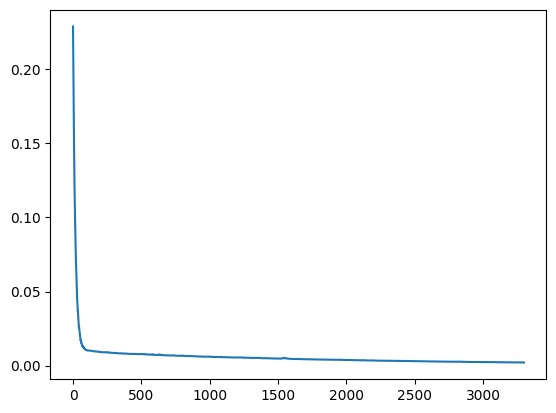

In [ ]:
print(loss_list)
plt.plot(loss_list)

In [ ]:
# Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs. 
#Use a tunable learning rate as discussed in the lectures from week 39. 
#Discuss the results as functions of the various parameters (size of batches, number of epochs etc)





#### Adagrad

Adagrad is the method of scaling down the learning rate as we go...

We initialise some learning rate $\eta$



<img src="image-20231014-152824.png" width="" align="" />

[Array(0.19539109, dtype=float32), Array(0.18193588, dtype=float32), Array(0.17124619, dtype=float32), Array(0.16148205, dtype=float32), Array(0.15352982, dtype=float32), Array(0.14620571, dtype=float32), Array(0.14069277, dtype=float32), Array(0.13735472, dtype=float32), Array(0.13223144, dtype=float32), Array(0.1271594, dtype=float32), Array(0.11154709, dtype=float32), Array(0.10162517, dtype=float32), Array(0.09453226, dtype=float32), Array(0.08968864, dtype=float32), Array(0.0847859, dtype=float32), Array(0.08074494, dtype=float32), Array(0.07706559, dtype=float32), Array(0.07452209, dtype=float32), Array(0.07268566, dtype=float32), Array(0.07052562, dtype=float32), Array(0.06102696, dtype=float32), Array(0.05462422, dtype=float32), Array(0.05169506, dtype=float32), Array(0.04800497, dtype=float32), Array(0.04529413, dtype=float32), Array(0.04323862, dtype=float32), Array(0.04112511, dtype=float32), Array(0.04019652, dtype=float32), Array(0.03932804, dtype=float32), Array(0.0385120

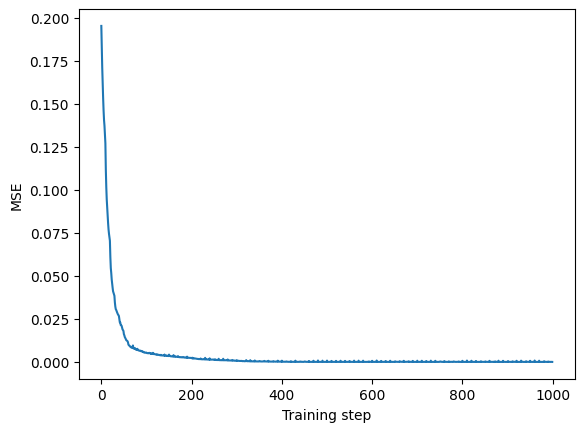

In [ ]:
def SGD_adagrad(grad_method, x, y, beta0, lr, n_epochs, batch_size, gamma=None, delta = 1e-8):

    # Initial value for the tuneable learning rate
    eta = lr

    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    # Initialise
    loss_list = []
    betas = [beta0]
    v = np.zeros_like(beta0) # initial v for momentum

    # Partition
    batches = random_partition(x, y, batch_size)

    # Number of batches
    n = y.shape[0]
    m = int(n / batch_size) 

    # For measuring loss
    X_true = feature_matrix(x, beta0.shape[0])

    for epoch in range(n_epochs):

        # reset accumulation variable
        r = 0

        for i in range(m):

            # Draw a batch and make feature matrix
            k = np.random.randint(m)
            x_b, y_b = batches[k]

            X = feature_matrix(x_b, num_features=beta0.shape[0])

            # Compute gradient of this sub-epoch
            gradients = grad_method(betas[-1], X, y_b)
    
            # Add to total gradient                
            r += gradients*gradients

            # Adagrad scaling, learning rate is scaled down, append new result
            lr_times_grad = eta/(delta+np.sqrt(r)) * gradients

            # Perform step
            if gamma is not None:
                v = gamma * v + lr_times_grad
                betas.append( betas[-1] - v )
            else:
                betas.append( betas[-1] - lr_times_grad)

            # Add loss
            loss_list.append(MSELoss(y, model(betas[-1], X_true)))

    
    # Return the found values of x 
    return betas, loss_list

num_params = 5
num_points = 100

beta0 = np.random.random((num_params, 1))

x = np.random.random((num_points, 1))
y = f(x)

betas, loss_list = SGD_adagrad(OLS_grad, x, y, beta0, batch_size=10, lr=0.01, n_epochs=100)

print(loss_list)
plt.plot(loss_list)
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()

#### RMS prop

In [ ]:
def SGD_RMS_prop(grad_method, x, y, beta0, lr, n_epochs, batch_size, gamma=0, delta = 1e-8):

    eta = 0.01

    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    # Accumulation variable
    rho = 0.05

    # Initialise
    loss_list = []
    betas = [beta0]
    v = np.zeros_like(beta0) # initial v for momentum

    # Partition
    batches = random_partition(x, y, batch_size)

    # Number of batches
    n = y.shape[0]
    m = int(n / batch_size) 

    # For measuring loss
    X_true = feature_matrix(x, beta0.shape[0])

    # Perform training
    for i in range(n_epochs):
        Giter = 0

        # Iterate over the batches
        for j in range(m):
            k = np.random.randint(m)
            x_b, y_b = batches[k]

            X = feature_matrix(x_b, num_features=beta0.shape[0])

            # Evaluate gradient at previous x
            grad = (1.0/batch_size)*grad_method(betas[-1], X, y_b)

            Giter = (rho*Giter+(1-rho)*grad*grad)
            #grad = derivative(betas[-1])

            loss_list.append(MSELoss(y, model(betas[-1], X_true)))
            
            update = grad*eta/(delta+np.sqrt(Giter))
            # Perform step
            v = gamma * v + update
            betas.append( betas[-1] - v )
        
    # Return the found values of x 
    return betas, loss_list

[Array(0.2541217, dtype=float32), Array(0.22843757, dtype=float32), Array(0.20486757, dtype=float32), Array(0.1824699, dtype=float32), Array(0.16147727, dtype=float32), Array(0.14177965, dtype=float32), Array(0.12336905, dtype=float32), Array(0.10637037, dtype=float32), Array(0.0905921, dtype=float32), Array(0.07635389, dtype=float32), Array(0.06327971, dtype=float32), Array(0.05103438, dtype=float32), Array(0.04049036, dtype=float32), Array(0.03124153, dtype=float32), Array(0.02326516, dtype=float32), Array(0.01676882, dtype=float32), Array(0.0113397, dtype=float32), Array(0.00744369, dtype=float32), Array(0.00460202, dtype=float32), Array(0.00309319, dtype=float32), Array(0.00242582, dtype=float32), Array(0.00251888, dtype=float32), Array(0.0021721, dtype=float32), Array(0.0022176, dtype=float32), Array(0.00197545, dtype=float32), Array(0.00210223, dtype=float32), Array(0.00174975, dtype=float32), Array(0.00131693, dtype=float32), Array(0.00204983, dtype=float32), Array(0.00108256, d

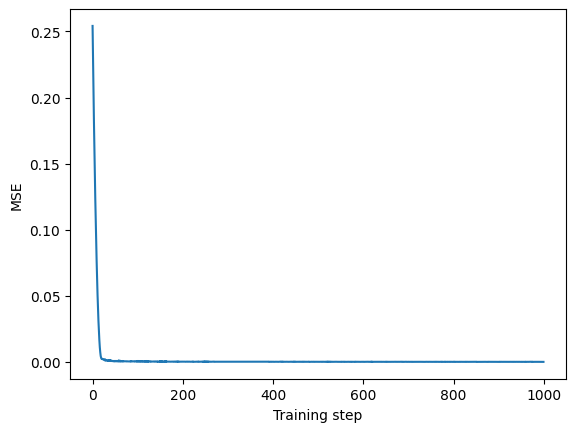

In [ ]:
num_params = 5
num_points = 100

beta0 = np.random.random((num_params, 1))

x = np.random.random((num_points, 1))
y = f(x)

betas, loss_list = SGD_RMS_prop(OLS_grad, x, y, beta0, batch_size=10, lr=0.01, n_epochs=100)

print(loss_list)
plt.plot(loss_list)
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()

#### Adam



<img src="image-20231014-160214.png" width="" align="" />

In [ ]:

def SGD_adam(grad_method, x, y, beta0:dict, n_epochs, batch_size, model_test = None, lr=0.01, gamma=0.0, delta = 1e-8, beta1=0.9, beta2=0.99):

    # Initial value for learning rate
    eta = lr


    keys = beta0.keys()

    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    # Initialise
    loss_list = []
    betas = [beta0]
    v = np.zeros_like(beta0) # initial v for momentum

    # Partition
    batches = random_partition(x, y, batch_size)
    # Number of batches
    n = y.shape[0]
    m = int(n / batch_size) 

    # For measuring loss
    X_true = feature_matrix(x, beta0["W1"].shape[0])

    s = {}
    r = {}
    v = {}

    for key in keys:
        v[key] = np.zeros_like(beta0[key])

    for epoch in range(n_epochs):

        # Accumulation variable
        for key in keys:
            s[key] = 0
            r[key] = 0
        #s = 0 # first moment
        #r = 0 # second moment

        for i in range(m):
            
            new_beta = {}

            # Draw a batch and make feature matrix
            k = np.random.randint(m)
            x_b, y_b = batches[k]
            X = feature_matrix(x_b, num_features=beta0["W1"].shape[0])

            # Compute gradient of this sub-epoch
            gradients = grad_method(betas[-1], X, y_b)


            for key in keys:
                # Accumulate
                s[key] = beta1*s[key] + (1-beta1)*gradients[key]
                r[key] = beta2*r[key] + (1-beta2)*gradients[key]*gradients[key]

                first_term = s[key]/(1-beta1**(epoch+1))            
                second_term = r[key]/(1-beta2**(epoch+1))

                # Adam scaling
                update = eta*first_term / (np.sqrt(second_term) + delta) # safe division with delta

                v[key] = gamma * v[key] + update
                # Perform step
                new_beta[key] = betas[-1][key] - v[key]

                # Add loss
            
            loss_list.append(MSELoss(y, model_test(betas[-1], X_true)))
            betas.append(new_beta)
    
    # Return the found values of x 
    return betas, loss_list

num_params = 5
num_points = 100

beta0 = np.random.random((num_params, 1))

x = np.random.random((num_points, 1))
y = f(x)

#betas, loss_list = SGD_adam(OLS_grad, x, y, beta0, batch_size=10, n_epochs=100)

# print(loss_list)
# plt.plot(loss_list)
# plt.xlabel("Training step")
# plt.ylabel("MSE")
# plt.show()

In [ ]:
def Ridge_loss_method(lam, model):
    return (lambda beta, X, y : Ridge_Loss(beta, X, y, model, lam))

def Ridge_Loss(beta, X, y, model, lam=0.01):
    return MSELoss(model(beta, X), y) + jnp.sum(jnp.power(beta, 2))*(lam/(2*jnp.size(y)))


def MSELoss_method(model):
    return (lambda beta, X, y : MSELoss(model(beta, X), y))


def MSELoss(y, y_pred):
    """MSE loss of prediction array.

    Args:
        y (ndarray): Target values
        y_pred (ndarray): Predicted values

    Returns:
        float: MSE loss
    """
    return jnp.sum(jnp.power(y - y_pred, 2)) / y.shape[0]

In [ ]:
def jax_loss_grad(loss_func):
    return grad(loss_func)


def model_2(beta, X):
    X_1 = jnp.dot(X, beta["W1"])
    X_1 = nn.sigmoid(X_1)
    X_2 = jnp.dot(X_1, beta["W2"]) + beta["b2"]
    X_2 = nn.sigmoid(X_2)
    return X_2


OLS_loss_2 = MSELoss_method(model=model_2)

MSE_grad = jax_loss_grad(OLS_loss_2)

Ridge_grad_jax = jax_loss_grad(loss_func=Ridge_loss_method(0.1, model=model))
OLS_grad_jax = jax_loss_grad(loss_func=MSELoss_method(model))


num_params = 5
middle_layer  = 10
num_points = 100

beta_try = {"W1":np.random.random((num_params, middle_layer)), "W2":np.random.random((middle_layer, 1)), "b2":np.random.random((1, 1))}



beta0 = np.random.random((num_params, 1))
x = np.random.random((num_points, 1))
y = f(x)

#print(test_grad(beta0, feature_matrix(X, num_params), y))

# betas, loss_list = GD(OLS_grad_jax, x, y, beta0, lr=0.01, n_epochs=100, gamma=0.88)

# print(loss_list)
# plt.plot(loss_list)
# plt.title("GD")
# plt.xlabel("Training step")
# plt.ylabel("MSE")
# plt.show()



betas, loss_list = SGD(OLS_grad_jax, x, y, beta0, batch_size=10, lr=0.01, n_epochs=100, gamma=0.99)

print(loss_list)
plt.plot(loss_list)
plt.title("SGD")
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()

# betas, loss_list = SGD_adagrad(OLS_grad_jax, x, y, beta0, batch_size=10, lr=0.01, gamma=0.99,delta=0.001, n_epochs=100)

# print(loss_list)
# plt.plot(loss_list)
# plt.title("Adagrad")
# plt.xlabel("Training step")
# plt.ylabel("MSE")
# plt.show()


# betas, loss_list = SGD_RMS_prop(OLS_grad_jax, x, y, beta0, batch_size=10, lr=0.01, gamma=0.99,delta=0.001, n_epochs=100)

# print(loss_list)
# plt.plot(loss_list)
# plt.title("RMS_prop")
# plt.xlabel("Training step")
# plt.ylabel("MSE")
# plt.show()


betas, loss_list = SGD_adam(MSE_grad, x, y, beta_try, lr=0.01, model_test=model_2, batch_size=10, gamma=0.0,delta=0.001, n_epochs=100)

plt.plot(loss_list)
plt.title("Adam")
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()

NameError: name 'MSELoss_method' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d717f43-f565-4198-bc5d-42467675cd81' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>